# Auto-Sklearn 설정 및 실행 가이드

## auto-sklearn
[auto-sklearn 공식 문서](https://automl.github.io/auto-sklearn/master/)

기본적으로 우분투 환경에서 지원하는 소스라 윈도우는 사용 불가능하지만, 도커를 통해 사용할 수 있습니다.

### Docker
[Docker Desktop for Windows](https://www.docker.com/products/docker-desktop/)

### WSL (Windows Subsystem for Linux)
WSL을 통해 리눅스 환경을 윈도우에서 사용할 수 있습니다. [WSL 설치 가이드](https://docs.microsoft.com/en-us/windows/wsl/install)



![Docker](https://img.shields.io/badge/docker-%230db7ed.svg?style=for-the-badge&logo=docker&logoColor=white)
![Ubuntu](https://img.shields.io/badge/Ubuntu-E95420?style=for-the-badge&logo=ubuntu&logoColor=white)
[![WSL](https://img.shields.io/badge/WSL-2-blue)](https://docs.microsoft.com/en-us/windows/wsl/install)


# Auto-Sklearn 설정 및 실행 가이드

## 1. Dockerfile 작성

먼저, `Dockerfile`을 작성하여 `auto-sklearn`을 사용할 수 있는 Docker 이미지를 생성합니다. 다음은 `Dockerfile`의 내용입니다:

```dockerfile
# Python 3.8 이미지에서 시작
FROM python:3.8

# 필수 패키지 설치
RUN apt-get update && apt-get install -y \
    build-essential \
    swig \
    python3-dev \
    && rm -rf /var/lib/apt/lists/*

# 작업 디렉토리 설정
WORKDIR /workspace

# 필요한 Python 패키지 설치
RUN pip install auto-sklearn
```

## 2. Docker 이미지 빌드

Dockerfile을 작성한 디렉토리에서 Docker 이미지를 빌드합니다:
```cmd
docker build -t autosklearn_image .
```

`결과 이미지`
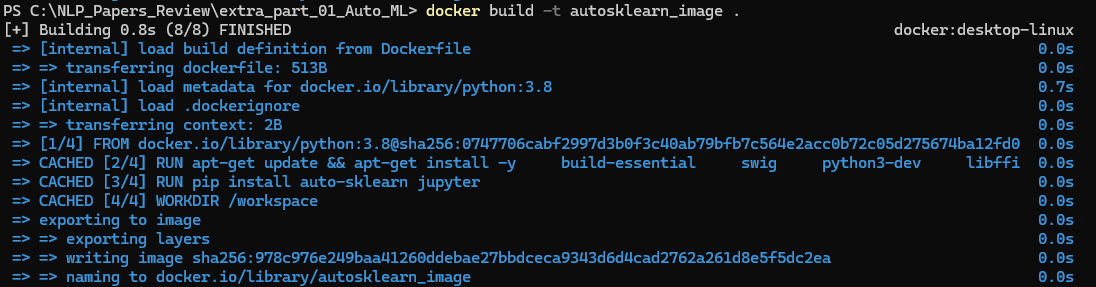

## 3. Docker 컨테이너 실행

이미지를 기반으로 Docker 컨테이너를 실행합니다:

```cmd
docker run -it --rm -p 8888:8888 -v C:\NLP_Papers_Review\extra_part_01_Auto_ML:/workspace autosklearn_image
```

`결과 이미지`
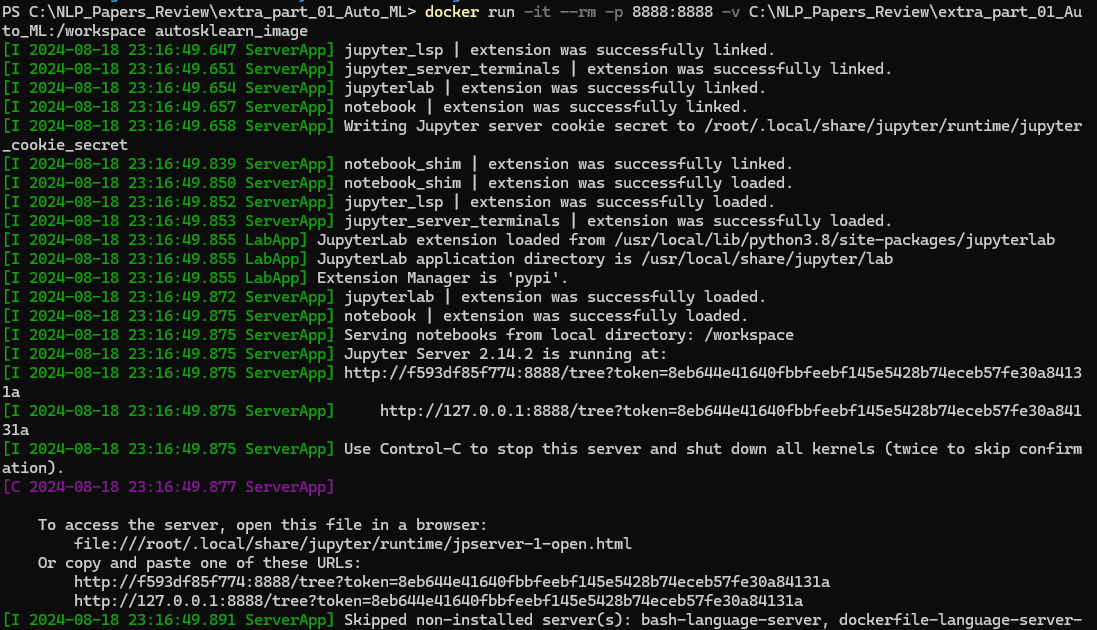

## 4. 해당 주피터 주소로 접속
    - 접속후 아래 코드를 실행 하면 됩니다.

In [7]:
import numpy as np
import pandas as pd
import os

# os.chdir(r'C:\NLP_Papers_Review\extra_part_01_Auto_ML\data')
# DATA_PATH=os.getcwd()


train=np.load('data/processed_train_data(titanic).npy')
test=np.load('data/processed_test_data(titanic).npy')
target=pd.read_csv('data/titanic_train.csv')['survived'].to_numpy()

train.shape,test.shape,target.shape

((916, 10), (393, 10), (916,))

In [15]:
import numpy as np
import pandas as pd
import autosklearn.classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import logging

# 데이터 로드
train = np.load('data/processed_train_data(titanic).npy')
test = np.load('data/processed_test_data(titanic).npy')
target = pd.read_csv('data/titanic_train.csv')['survived'].to_numpy()

# 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size=0.2, random_state=42)

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# auto-sklearn 분류기 생성 및 학습
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=300,  # 전체 작업 시간 (예: 5분)
    per_run_time_limit=30,        # 각 모델 학습 시간 제한 (예: 30초)
    n_jobs=-1                     # 모든 CPU 코어 사용
)

# 학습 시작
automl.fit(X_train, y_train)

# 검증 데이터로 예측
y_pred = automl.predict(X_valid)

# 성능 평가
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_valid, y_pred))

# 테스트 데이터로 예측
test_predictions = automl.predict(test)

# 모델 목록과 최고 성능 모델 정보 출력
print("Models used:")
for model in automl.show_models():
    print(model)

# 최고 성능 모델 정보
print("\nBest performing model:")
print(automl.show_models())

print("\nEnsemble:")
print(automl.show_models())

print("\nEnsemble performance:")
print(automl.score(X_valid, y_valid))


Validation Accuracy: 0.8315
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       114
           1       0.77      0.80      0.78        70

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184

Models used:
9
21
23
29
34
35
36
38
40
42
45
46
51
52
54
63
66
68
70
71
72
73
77
80
81
82
83
91
92

Best performing model:
{9: {'model_id': 9, 'rank': 1, 'cost': 0.12809917355371903, 'ensemble_weight': 0.02, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f66b524e4c0>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f66c9671130>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f66c96718b0>, 'sklearn_clas

In [14]:
test_predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

In [13]:
# 예측 결과를 CSV 파일로 저장
submission_path = 'C:/NLP_Papers_Review/extra_part_01_Auto_ML/data/titanic_predictions_autosklearn.csv'
submission = pd.DataFrame({'Survived': test_predictions})
submission.to_csv(submission_path, index=False)
print(f'Submission file saved to {submission_path}')

Submission file saved to submission.csv
